## IMPORTS

In [1]:
import pandas as pd
import sys
from matplotlib import pyplot as plt
import pickle

sys.path.append('../../')
from utils import clustering_utils, bokeh_ui_utils, file_utils, rna_seq_utils, microarray_utils

/Users/michaelbertagna/anaconda3/envs/cdh2_bokeh.env/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/michaelbertagna/anaconda3/envs/cdh2_bokeh.env/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/michaelbertagna/anaconda3/env

In [2]:
dataset = 'rna_seq'
phases = 'rna_seq'

full_filtered_df = pd.read_csv('../../active_files/rna_seq.csv')
full_filtered_norm_df = rna_seq_utils.normalize_expression_per_gene(full_filtered_df)

num_genes = full_filtered_norm_df.shape[0]
num_genes

21524

In [3]:
dataset = 'microarray'
phases = 'full'

full_filtered_df = pd.read_csv('../../active_files/allgood_filt_agg_tidy_2021aligned_qc_rma_expression_full.csv')

full_filtered_norm_df = microarray_utils.normalize_expression_per_gene(full_filtered_df, z=True)

num_genes = full_filtered_norm_df.shape[0]
num_genes

19152

In [4]:
full_filtered_df.sample(10)

,TTHERM_ID,Ll_GSM283687,Ll_GSM284355,Ll_GSM284362,Lm_GSM283690,Lm_GSM284357,Lm_GSM284363,Lh_GSM283691,Lh_GSM284360,Lh_GSM284364,...,C12_GSM656237,C14_GSM285580,C14_GSM285593,C14_GSM656238,C16_GSM285582,C16_GSM285595,C16_GSM656239,C18_GSM285583,C18_GSM285596,C18_GSM656240
13157,YF00022571.t1,13.165956,13.908795,13.842272,13.255715,14.125737,13.779704,12.848171,13.939016,13.848519,...,13.900629,13.974313,14.109367,14.118264,13.604643,13.609735,14.091702,13.392543,13.066154,13.778600
12805,YF00021866.t1,15.903048,15.944877,15.813064,15.956898,15.916205,15.885456,15.965419,15.856743,15.976244,...,15.918967,15.920029,15.877022,15.974984,15.950730,15.978033,15.978871,15.955704,15.977544,15.978864
9474,YF00016537.t1,5.777374,6.303448,6.256410,6.812272,6.470940,6.010517,7.039042,5.859237,5.476768,...,6.610530,6.359801,6.368489,5.876556,5.900612,6.135527,6.165772,5.454015,6.468270,5.651670
6519,YF00011187.t1,5.194798,4.919973,4.743780,5.091269,4.876167,4.772474,5.220257,4.657085,4.738656,...,12.390603,8.575093,8.487429,13.419317,9.673630,9.514911,14.282586,9.420210,9.433108,14.857427
1002,YF00001535.t1,11.031187,10.429077,11.011425,11.114951,10.451859,10.888045,11.311768,10.722223,11.216191,...,10.637523,10.450487,10.784302,10.622159,10.635668,10.932198,10.212049,10.723524,10.852221,10.603433
15826,YF00026948.t1,8.123778,8.288136,8.254771,7.945855,7.763038,8.035624,7.242200,8.383732,8.350769,...,8.944583,9.724869,9.255570,9.348819,9.536100,9.219353,10.234931,8.424362,8.791591,10.383409
3234,YF00005351.t1,9.706105,9.498097,9.229191,11.384505,10.579927,10.493631,11.432247,9.116514,9.106486,...,8.345161,8.116847,7.882126,9.163413,7.823377,6.728149,8.647988,8.207505,6.904549,8.589212
18996,YF00037827.t1,7.313945,6.947258,6.898786,7.276318,6.671691,6.802413,7.155895,6.688943,6.789391,...,7.659667,7.754582,7.952735,7.963871,7.289500,7.508873,7.283512,7.582964,7.627910,7.221679
15051,YF00025471.t1,7.803889,9.007966,8.595780,7.714684,8.586207,8.447299,7.250688,8.708446,8.274305,...,8.294281,9.576292,9.309844,9.598118,8.712462,8.549564,9.359347,8.305152,8.601033,9.209456
223,YF00000355.t1,6.607608,6.133189,6.379586,5.283660,6.014936,5.756561,4.709530,4.934945,5.174705,...,4.742526,4.969093,5.032956,4.732568,4.905388,4.758125,5.258147,4.816086,5.135357,4.573984


### LEIDEN CLUSTERING

In [5]:
metric = 'manhattan'
# metric='minkowski_3.0'

# resolution_param=0.050
resolution_param=0.005

n_neighbors = 3

In [6]:
leiden_label_df_round_1, partition_stats, cluster_sizes, enriched_cluster_sizes =  clustering_utils.build_label_df(
    full_filtered_norm_df, 
    dataset,
    metric=metric, 
    n_neighbors=n_neighbors, 
    resolution_param=resolution_param, 
    partition_type = 'EXP', 
    n_jobs = -1, 
    random_state=42
    )

In [7]:
leiden_label_df_round_1_arranged = bokeh_ui_utils.arrange_modules(full_filtered_norm_df, leiden_label_df_round_1, phases) 
leiden_label_df_round_1_arranged_sorted = leiden_label_df_round_1_arranged.sort_values(by=['label', 'TTHERM_ID'], ascending=False)
leiden_label_df_round_1_arranged_sorted.to_csv('./rna_seq_label_df_round_1.csv', index=False)

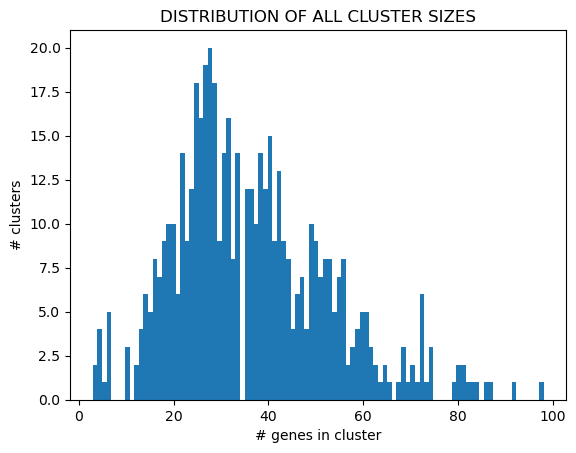

In [8]:
plt.hist(cluster_sizes, max(cluster_sizes))
plt.title('DISTRIBUTION OF ALL CLUSTER SIZES')
plt.xlabel('# genes in cluster')
plt.ylabel('# clusters')
plt.show()

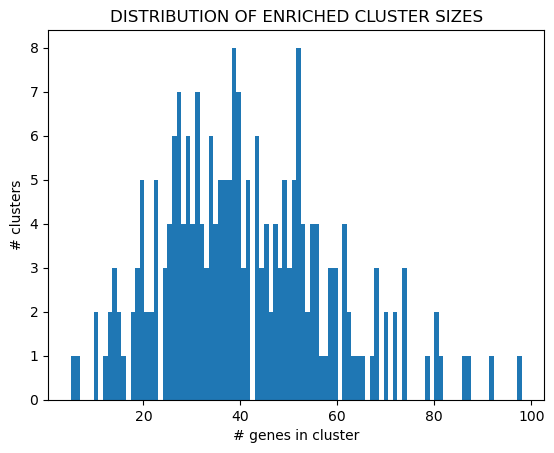

In [9]:
plt.hist(enriched_cluster_sizes, max(enriched_cluster_sizes))
plt.title('DISTRIBUTION OF ENRICHED CLUSTER SIZES')
plt.xlabel('# genes in cluster')
plt.ylabel('# clusters')
plt.show()

In [10]:
key_lens = [len(k) for k in partition_stats.keys()]
max_key_len = max(key_lens)

for k, v in partition_stats.items():
    print(f'{" " * (max_key_len - len(k))}{k}:', v)

              partition_type: EXP
              dimensionality: baseline
                      metric: manhattan
                       graph: umap_fuzzy_simplicial_set
                         nns: 3
                  clustering: leiden_cpm
                   parameter: 0.005
            silhouette_score: -0.03197937708751679
                  modularity: 0.7313607080581936
                   nclusters: 524
           mean_cluster_size: 36.54961832061068
         median_cluster_size: 34.0
             sd_cluster_size: 16.40573989130141
          nenriched_clusters: 221
  mean_enriched_cluster_size: 40.98642533936651
median_enriched_cluster_size: 39.0
    sd_enriched_cluster_size: 17.153150875549308
     nenriched_cluster_genes: 9058
                    datetime: 2024-05-08 17:36:23.715400


In [11]:
enrich_full_nn3 = clustering_utils.compute_enrichment(leiden_label_df_round_1_arranged_sorted)

In [12]:
outfile='../enrichment/test_nn3_full_enrichment.csv'
enrich_full_nn3.to_csv(outfile, index=False)

In [13]:
complete_annot = pd.read_csv('../../active_files/complete_annotation.csv')

In [14]:
palette45 = """
#51635F\n#FF1C16\n#16FC26\n#403DFC\n#FE0DCE\n#F9AA00\n#00FFD5\n#22BFFE\n#BB3551\n#E6FE97\n#ECADFF\n#FFBFBD\n#CF00F5\n#0D8B00\n#D7FEFF\n#8D7200\n#F76C00\n#AD3288\n#5C5AB8\n#FC0080\n#B8FF16\n#00AAB4\n#FBE11C\n#9AAAD9\n#8BBB8C\n#934B47\n#6EFE99\n#9C6D91\n#FB9778\n#9D32AF\n#D40087\n#FFDC9D\n#FF8DB6\n#A96AFC\n#FDDDFB\n#168CF7\n#FD6CF9\n#F64553\n#4D6A00\n#FAFEDB\n#A7977D\n#0DFBFF\n#86B80D\n#FD8AE4\n#B7B126
""".split()

palette32 = """
white\n#F91622\n#16FC0D\n#5138FB\n#FD00CF\n#FDD51C\n#16FDD7\n#FC8B8E\n#16BFFF\n#DF9BFD\n#669C2A\n#FEE7C4\n#F31685\n#DF16FD\n#C1F1FE\n#A23D7E\n#D5FD0D\n#8C5A0D\n#FC790D\n#4F5CBC\n#FFCBEF\n#168D72\n#68FA93\n#C4FDC9\n#F7A449\n#16789B\n#AD0DAB\n#C4262E\n#0DF1FF\n#EFF994\n#B6C1FE\n#8F22CD
""".split()

palette35 = """
#585F6A\n#FE1626\n#00FB0D\n#2E40FC\n#FD0DCE\n#FCD200\n#F7868C\n#16FFDC\n#22BEFB\n#D28EF6\n#609000\n#FFE7C9\n#F51683\n#FF730D\n#CAFE16\n#AA3586\n#BEEEFD\n#BD00FA\n#895D22\n#FEC7F0\n#495AA1\n#73F995\n#229270\n#ED963B\n#F6FE97\n#C5FFD0\n#C50DC8\n#6993FF\n#C22A35\n#16ECFC\n#AA707E\n#7A3BCB\n#7C845C\n#358FAA\n#BDBAF6
""".split()

palette38 = """
#636265\n#F60D16\n#00F90D\n#3540FB\n#FD0DD0\n#FDDB0D\n#00FFE2\n#FA8884\n#2ABEFE\n#E5A3FF\n#518F00\n#FEFDD5\n#D51CFF\n#ED007F\n#A33879\n#96731C\n#C8FB16\n#C0ECFE\n#FBC1DA\n#5658BA\n#F96900\n#F69F1C\n#58FA9C\n#008E72\n#BA22B9\n#167D97\n#794D8A\n#CEFE9C\n#BB222E\n#954D45\n#00DCEF\n#FD66B0\n#B2FDD3\n#FDBD9F\n#A9B4F1\n#B371FE\n#849566\n#2A8EFF
""".split()

palette64 = """
white\n#FA002E\n#22FC22\n#221CFA\n#FF3DD6\n#FFDA00\n#00FEFB\n#F48684\n#CEB4FE\n#FFFFE5\n#0D933D\n#CC00F8\n#800D5D\n#F10084\n#22267A\n#0DADFF\n#CBFD71\n#9A761C\n#F96C00\n#6399A6\n#FFBCDA\n#8D0DA3\n#F79F26\n#00FFBF\n#A37CFB\n#F68EEB\n#720D0D\n#F163AA\n#7E926A\n#826386\n#B41C32\n#9BEBCE\n#E2DB83\n#56D4FA\n#E6E2FB\n#925D58\n#F7C3A7\n#62E970\n#220DBD\n#5583BB\n#7EA01C\n#CDFDB6\n#FD00FB\n#B30D97\n#F5FF00\n#DD77FD\n#4282FC\n#BBA6A4\n#0D8068\n#AB5F26\n#F7C26E\n#9EFE00\n#9B2EFD\n#C56887\n#FD3D68\n#ABF2FD\n#835FAC\n#FF16B1\n#325371\n#CA16CA\n#D26322\n#AFCFFE\n#91A1FA\nfloralwhite
""".split()

palette65 = """
white\ngainsboro\n#FA002E\n#22FC22\n#221CFA\n#FF3DD6\n#FFDA00\n#00FEFB\n#F48684\n#CEB4FE\n#FFFFE5\n#0D933D\n#CC00F8\n#800D5D\n#F10084\n#22267A\n#0DADFF\n#CBFD71\n#9A761C\n#F96C00\n#6399A6\n#FFBCDA\n#8D0DA3\n#F79F26\n#00FFBF\n#A37CFB\n#F68EEB\n#720D0D\n#F163AA\n#7E926A\n#826386\n#B41C32\n#9BEBCE\n#E2DB83\n#56D4FA\n#E6E2FB\n#925D58\n#F7C3A7\n#62E970\n#220DBD\n#5583BB\n#7EA01C\n#CDFDB6\n#FD00FB\n#B30D97\n#F5FF00\n#DD77FD\n#4282FC\n#BBA6A4\n#0D8068\n#AB5F26\n#F7C26E\n#9EFE00\n#9B2EFD\n#C56887\n#FD3D68\n#ABF2FD\n#835FAC\n#FF16B1\n#325371\n#CA16CA\n#D26322\n#AFCFFE\n#91A1FA\nfloralwhite
""".split()

In [15]:
palette36 = ["#FFFFFF", 
             "#E4E1E3", 
             "#F6222E", 
             "#FE00FA", 
             "#16FF32", 
             "#3283FE", 
             "#FEAF16", 
             "#B00068", 
             "#1CFFCE",
             "#90AD1C", 
             "#2ED9FF", 
             "#DEA0FD", 
             "#AA0DFE", 
             "#F8A19F", 
             "#325A9B", 
             "#C4451C", 
             "#1C8356", 
             "#85660D",
             "#B10DA1", 
             "#FBE426", 
             "#1CBE4F", 
             "#FA0087", 
             "#FC1CBF", 
             "#F7E1A0", 
             "#C075A6", 
             "#782AB6", 
             "#AAF400",
             "#BDCDFF", 
             "#822E1C", 
             "#B5EFB5", 
             "#7ED7D1", 
             "#1C7F93", 
             "#D85FF7", 
             "#683B79", 
             "#66B0FF", 
             "#3B00FB",
             "magenta"]

change index 5 to #778899. Change index 9 to #2F4F4F. Add #FF7F50. Change index 9 to #FFBCD9. Change index 14 to #DEA5A4

In [16]:
palette27 = ["#FFFFFF", 
             "#AA0DFE", 
             "#3283FE", 
             "#85660D", 
             "#782AB6", 
             "#778899", 
             "#1C8356", 
             "#16FF32", 
             "#F7E1A0", 
#              "#2F4F4F",
             "#FFBCD9", 
             "#C4451C", 
             "#DEA0FD", 
             "#FE00FA", 
#              "#325A9B", 
             "#FEAF16", 
             "#DEA5A4", 
             "#90AD1C", 
             "#F6222E",
             "#1CFFCE", 
             "#2ED9FF", 
             "#B10DA1", 
#              "#C075A6", 
#              "#FC1CBF", 
#              "#B00068", 
             "#FBE426", 
             "#FA0087",
             "#FF7F50"
            ]

In [17]:
with open(('colors_2000_1'), 'rb') as file:
    color_palette_raw = pickle.load(file)

color_palette = palette65

if len(color_palette_raw) >= max(leiden_label_df_round_1_arranged_sorted['label'].unique()) + 1:
    color_palette = color_palette_raw[:max(leiden_label_df_round_1_arranged_sorted['label'].unique()) + 1]

In [18]:
embedding_metric = 'manhattan'

merge = bokeh_ui_utils.generate_server_data(full_filtered_norm_df, complete_annot, leiden_label_df_round_1_arranged_sorted, phases, color_palette, n_neighbors=n_neighbors, random_state=42, embedding_metric=embedding_metric)
merge.shape

/Users/michaelbertagna/anaconda3/envs/cdh2_bokeh.env/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


(19152, 47)

In [19]:
merge.head()

,TTHERM_ID,label,Ll,Lm,Lh,S0,S3,S6,S9,S15,...,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs,TGD2021_description,expr_xs,expr_ys,module,radius
0,YF00037485.t1,523,0.504090,-0.481672,-0.917378,-0.705318,2.677390,0.386471,-0.242218,0.035910,...,"ko00000,ko00001,ko02000","3.A.1.208,3.A.1.208.2,3.A.1.208.8",-,-,"ABC_membrane,ABC_tran",-,"[Ll, Lm, Lh, S0, S3, S6, S9, S15, S24, C0, C4,...","[0.5040903658079006, -0.48167236616375925, -0....",m0523,0.085021
1,YF00032514.t1,523,0.603411,-0.176365,-0.993188,0.301007,1.961144,0.728375,-0.689001,-0.148516,...,"ko00000,ko01000",-,-,-,TatD_DNase,-,"[Ll, Lm, Lh, S0, S3, S6, S9, S15, S24, C0, C4,...","[0.6034112024862683, -0.17636514359774513, -0....",m0523,0.085021
2,YF00028420.t1,523,1.387787,0.846690,0.035371,1.337327,1.596776,0.146502,-0.305619,0.709964,...,"ko00000,ko00001,ko01000,ko03016",-,-,-,"Lactamase_B,Lactamase_B_2,Lactamase_B_4",-,"[Ll, Lm, Lh, S0, S3, S6, S9, S15, S24, C0, C4,...","[1.3877874332382145, 0.8466901638517627, 0.035...",m0523,0.085021
3,YF00027978.t1,523,-0.801461,-0.955284,-0.827596,-0.627875,2.119416,1.873957,1.231945,-0.121550,...,-,-,-,-,-,-,"[Ll, Lm, Lh, S0, S3, S6, S9, S15, S24, C0, C4,...","[-0.8014608287774525, -0.9552836242844812, -0....",m0523,0.085021
4,YF00026788.t1,523,-0.356446,-0.371140,-0.455583,-0.758753,2.352668,0.915207,-0.268553,0.216600,...,"ko00000,ko00001,ko00002,ko01000,ko02000,ko04121","1.A.12.2.2,1.A.12.3.2,3.A.1.208.7",-,-,"GST_C_3,GST_N",-,"[Ll, Lm, Lh, S0, S3, S6, S9, S15, S24, C0, C4,...","[-0.356446487266397, -0.3711399549893724, -0.4...",m0523,0.085021


In [20]:
merge.columns

Index(['TTHERM_ID', 'label', 'Ll', 'Lm', 'Lh', 'S0', 'S3', 'S6', 'S9', 'S15',
       'S24', 'C0', 'C4', 'C6', 'C8', 'C10', 'C12', 'C14', 'C16', 'C18', 'x',
       'y', 'seed_ortholog', 'evalue', 'score', 'eggNOG_OGs', 'max_annot_lvl',
       'COG_category', 'Description', 'Preferred_name', 'GOs', 'EC', 'KEGG_ko',
       'KEGG_Pathway', 'KEGG_Module', 'KEGG_Reaction', 'KEGG_rclass', 'BRITE',
       'KEGG_TC', 'CAZy', 'BiGG_Reaction', 'PFAMs', 'TGD2021_description',
       'expr_xs', 'expr_ys', 'module', 'radius'],
      dtype='object')

In [21]:
yf_to_ttherm_map_df = pd.read_csv('../../new_raw_data/tgd2024/yf_ttherm_mapping_may2024.csv')
yf_to_ttherm_map_df.rename(columns={'TTHERM_ID': 'TTHERM_IDs', 'YF_ID': 'TTHERM_ID'},inplace=True)
yf_to_ttherm_map_df

,TTHERM_ID,TTHERM_IDs
0,YF00028510.t1,TTHERM_01539710 TTHERM_001050489 TTHERM_001050...
1,YF00028508.t1,TTHERM_01539710 TTHERM_01539710 TTHERM_0015396...
2,YF00038323.t1,TTHERM_01539710 TTHERM_001224653 TTHERM_001050...
3,YF00038325.t1,TTHERM_01539710 TTHERM_001050489 TTHERM_010505...
4,YF00002076.t1,TTHERM_000730254
...,...,...
26899,YF00021940.t1,TTHERM_000609459
26900,YF00026614.t1,TTHERM_00057200
26901,YF00027283.t1,TTHERM_002653405
26902,YF00030965.t1,TTHERM_00637010


In [22]:
merge.head()

,TTHERM_ID,label,Ll,Lm,Lh,S0,S3,S6,S9,S15,...,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs,TGD2021_description,expr_xs,expr_ys,module,radius
0,YF00037485.t1,523,0.504090,-0.481672,-0.917378,-0.705318,2.677390,0.386471,-0.242218,0.035910,...,"ko00000,ko00001,ko02000","3.A.1.208,3.A.1.208.2,3.A.1.208.8",-,-,"ABC_membrane,ABC_tran",-,"[Ll, Lm, Lh, S0, S3, S6, S9, S15, S24, C0, C4,...","[0.5040903658079006, -0.48167236616375925, -0....",m0523,0.085021
1,YF00032514.t1,523,0.603411,-0.176365,-0.993188,0.301007,1.961144,0.728375,-0.689001,-0.148516,...,"ko00000,ko01000",-,-,-,TatD_DNase,-,"[Ll, Lm, Lh, S0, S3, S6, S9, S15, S24, C0, C4,...","[0.6034112024862683, -0.17636514359774513, -0....",m0523,0.085021
2,YF00028420.t1,523,1.387787,0.846690,0.035371,1.337327,1.596776,0.146502,-0.305619,0.709964,...,"ko00000,ko00001,ko01000,ko03016",-,-,-,"Lactamase_B,Lactamase_B_2,Lactamase_B_4",-,"[Ll, Lm, Lh, S0, S3, S6, S9, S15, S24, C0, C4,...","[1.3877874332382145, 0.8466901638517627, 0.035...",m0523,0.085021
3,YF00027978.t1,523,-0.801461,-0.955284,-0.827596,-0.627875,2.119416,1.873957,1.231945,-0.121550,...,-,-,-,-,-,-,"[Ll, Lm, Lh, S0, S3, S6, S9, S15, S24, C0, C4,...","[-0.8014608287774525, -0.9552836242844812, -0....",m0523,0.085021
4,YF00026788.t1,523,-0.356446,-0.371140,-0.455583,-0.758753,2.352668,0.915207,-0.268553,0.216600,...,"ko00000,ko00001,ko00002,ko01000,ko02000,ko04121","1.A.12.2.2,1.A.12.3.2,3.A.1.208.7",-,-,"GST_C_3,GST_N",-,"[Ll, Lm, Lh, S0, S3, S6, S9, S15, S24, C0, C4,...","[-0.356446487266397, -0.3711399549893724, -0.4...",m0523,0.085021


In [23]:
merge = merge.merge(yf_to_ttherm_map_df, on='TTHERM_ID', how='left')
merge.head()

,TTHERM_ID,label,Ll,Lm,Lh,S0,S3,S6,S9,S15,...,KEGG_TC,CAZy,BiGG_Reaction,PFAMs,TGD2021_description,expr_xs,expr_ys,module,radius,TTHERM_IDs
0,YF00037485.t1,523,0.504090,-0.481672,-0.917378,-0.705318,2.677390,0.386471,-0.242218,0.035910,...,"3.A.1.208,3.A.1.208.2,3.A.1.208.8",-,-,"ABC_membrane,ABC_tran",-,"[Ll, Lm, Lh, S0, S3, S6, S9, S15, S24, C0, C4,...","[0.5040903658079006, -0.48167236616375925, -0....",m0523,0.085021,TTHERM_00951770 TTHERM_00951730
1,YF00032514.t1,523,0.603411,-0.176365,-0.993188,0.301007,1.961144,0.728375,-0.689001,-0.148516,...,-,-,-,TatD_DNase,-,"[Ll, Lm, Lh, S0, S3, S6, S9, S15, S24, C0, C4,...","[0.6034112024862683, -0.17636514359774513, -0....",m0523,0.085021,TTHERM_00334280
2,YF00028420.t1,523,1.387787,0.846690,0.035371,1.337327,1.596776,0.146502,-0.305619,0.709964,...,-,-,-,"Lactamase_B,Lactamase_B_2,Lactamase_B_4",-,"[Ll, Lm, Lh, S0, S3, S6, S9, S15, S24, C0, C4,...","[1.3877874332382145, 0.8466901638517627, 0.035...",m0523,0.085021,TTHERM_01125320
3,YF00027978.t1,523,-0.801461,-0.955284,-0.827596,-0.627875,2.119416,1.873957,1.231945,-0.121550,...,-,-,-,-,-,"[Ll, Lm, Lh, S0, S3, S6, S9, S15, S24, C0, C4,...","[-0.8014608287774525, -0.9552836242844812, -0....",m0523,0.085021,TTHERM_00754690 TTHERM_00754680
4,YF00026788.t1,523,-0.356446,-0.371140,-0.455583,-0.758753,2.352668,0.915207,-0.268553,0.216600,...,"1.A.12.2.2,1.A.12.3.2,3.A.1.208.7",-,-,"GST_C_3,GST_N",-,"[Ll, Lm, Lh, S0, S3, S6, S9, S15, S24, C0, C4,...","[-0.356446487266397, -0.3711399549893724, -0.4...",m0523,0.085021,TTHERM_00274620


In [24]:
merge.shape

(19152, 48)

In [25]:
merge.loc[merge['TTHERM_IDs'].isnull()].shape

(649, 48)

In [26]:
yf_to_ttherm_map_df.loc[yf_to_ttherm_map_df['TTHERM_IDs'].isnull()].shape

(2567, 2)

In [27]:
with open('./server_data.pkl', 'wb') as f:
    pickle.dump(merge, f)